In [2]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
 
from sklearn import metrics

In [3]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [4]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Dictionary 

In [4]:
df_dd = pd.read_csv("HomeCredit_columns_description.csv")

In [5]:
df_dd[df_dd['Table'] == 'previous_application.csv'][['Row', 'Description', 'Special']]

,Row,Description,Special
173,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
174,SK_ID_CURR,ID of loan in our sample,hashed
175,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
176,AMT_ANNUITY,Annuity of previous application,NaN
177,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
178,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
179,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
180,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
181,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
182,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


In [5]:
df = pd.read_csv('Credit_card_Balance.csv')

In [6]:
df.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [7]:
df.tail(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.00,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.0,1879.11,0.000,0.00,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,375750.00,356994.675,269356.14,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.00,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [9]:

for col in df.columns:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(df[col].nunique()))
    print("\nMissing values Count:: " + str(df[col].isnull().sum()))
#     print("\nUnique Values Count:: \n" + str(df[col].value_counts()))
    print("=============== " + str(col) +" End===============")


=============== SK_ID_PREV Start===============

Unique values :: 104307

Missing values Count:: 0
=============== SK_ID_PREV End===============
=============== SK_ID_CURR Start===============

Unique values :: 103558

Missing values Count:: 0
=============== SK_ID_CURR End===============
=============== MONTHS_BALANCE Start===============

Unique values :: 96

Missing values Count:: 0
=============== MONTHS_BALANCE End===============
=============== AMT_BALANCE Start===============

Unique values :: 1347904

Missing values Count:: 0
=============== AMT_BALANCE End===============
=============== AMT_CREDIT_LIMIT_ACTUAL Start===============

Unique values :: 181

Missing values Count:: 0
=============== AMT_CREDIT_LIMIT_ACTUAL End===============
=============== AMT_DRAWINGS_ATM_CURRENT Start===============

Unique values :: 2267

Missing values Count:: 749816
=============== AMT_DRAWINGS_ATM_CURRENT End===============
=============== AMT_DRAWINGS_CURRENT Start===============

Unique val

#### Observations

DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DRAWING, DAYS_TERMINATION, DAYS_FIRST_DUE, DAYS_LAST_DUE Columns have max value as 356243 which is a default or garbage value. we will replace these values with mean

NFLAG_INSURED_ON_APPROVAL : Form the data description it can be found that the deault value can be 0


NAME_TYPE_SUITE: Let us consider the Nan case as the unUnaccompanied - DROP THE COLUMNS

RATE_DOWN_PAYMENT : With

### Missing value treatment


Annuities: 
Most of us have had the experience of making a series of fixed payments over a period of time—such as rent or car payments—or receiving a series of payments for a period of time, such as interest from a bond or certificate of deposit (CD). These recurring or ongoing payments are technically referred to as "annuities"





DAYS_FIRST_DUE - when was the first due date (first installment)
DAYS_LAST_DUE_1ST_VERSION - when was the planned last due date (last installment) - information from the time of application
DAYS_LAST_DUE - when was the last due date (last installment) - most recent information (last due date may change e.g. in case of early repayment or payment difficulties)

NAME_TYPE_SUITE: Let us consider the Nan case as the unUnaccompanied

In [10]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [11]:
df.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [12]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [13]:
missing_value_df

,percent_missing
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
MONTHS_BALANCE,0.000000
AMT_BALANCE,0.000000
AMT_CREDIT_LIMIT_ACTUAL,0.000000
AMT_DRAWINGS_ATM_CURRENT,19.524872
AMT_DRAWINGS_CURRENT,0.000000
AMT_DRAWINGS_OTHER_CURRENT,19.524872
AMT_DRAWINGS_POS_CURRENT,19.524872
AMT_INST_MIN_REGULARITY,7.948208


In [14]:
missing_value_df['unique_values_count'] = df.nunique() 
missing_value_df['unique_percentage'] = (df.nunique()/df.shape[0])*100 

In [15]:
missing_value_df['missing_values'] = df.isnull().sum() 

In [16]:
missing_value_df[missing_value_df['percent_missing']>70]

,percent_missing,unique_values_count,unique_percentage,missing_values


In [17]:
missing_value_df

,percent_missing,unique_values_count,unique_percentage,missing_values
SK_ID_PREV,0.000000,104307,2.716107,0
SK_ID_CURR,0.000000,103558,2.696604,0
MONTHS_BALANCE,0.000000,96,0.002500,0
AMT_BALANCE,0.000000,1347904,35.098815,0
AMT_CREDIT_LIMIT_ACTUAL,0.000000,181,0.004713,0
AMT_DRAWINGS_ATM_CURRENT,19.524872,2267,0.059032,749816
AMT_DRAWINGS_CURRENT,0.000000,187005,4.869526,0
AMT_DRAWINGS_OTHER_CURRENT,19.524872,1832,0.047704,749816
AMT_DRAWINGS_POS_CURRENT,19.524872,168748,4.394122,749816
AMT_INST_MIN_REGULARITY,7.948208,312266,8.131266,305236


In [18]:
df[df['CNT_DRAWINGS_ATM_CURRENT'].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45,2657726,399970,-5,0.0,225000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
47,1517613,121258,-6,0.0,135000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
49,2408643,104761,-4,0.0,225000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
52,1322825,215709,-5,0.0,180000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
60,1217908,162464,-5,0.0,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [19]:
df.shape[0]
df['SK_ID_PREV'].nunique()
df['SK_ID_CURR'].nunique()

3840312

104307

103558

In [20]:
df.shape[0]/df['SK_ID_PREV'].nunique()

36.81739480571774

In [21]:
df['SK_ID_CURR'].sample(5).values

array([201687, 112139, 396662, 287740, 128514], dtype=int64)

In [22]:

for i in df['SK_ID_CURR'].sample(5).values:
    df[df['SK_ID_CURR']==i].sort_values(['MONTHS_BALANCE'])

# df[df['SK_ID_CURR']==121258].sort_values(['MONTHS_BALANCE'])

# df[df['SK_ID_CURR']==215709].sort_values(['MONTHS_BALANCE'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3369077,1542311,138380,-96,51061.860,67500,0.0,0.00,0.0,0.00,3375.0,9000.0,9000.0,49222.215,51061.860,51061.860,0.0,0,0.0,0.0,4.0,Active,0,0
1002826,1542311,138380,-95,48361.725,67500,0.0,0.00,0.0,0.00,3375.0,4500.0,4500.0,46561.860,48361.725,48361.725,0.0,0,0.0,0.0,5.0,Active,0,0
3010694,1542311,138380,-94,50125.590,67500,0.0,0.00,0.0,0.00,3375.0,0.0,0.0,46561.860,50125.590,50125.590,0.0,0,0.0,0.0,6.0,Active,1,1
3058196,1542311,138380,-93,42784.875,67500,0.0,0.00,0.0,0.00,3375.0,9000.0,9000.0,41125.590,42784.875,42784.875,0.0,0,0.0,0.0,7.0,Active,0,0
2230149,1542311,138380,-92,39943.260,67500,0.0,0.00,0.0,0.00,3375.0,4500.0,4500.0,38284.875,39943.260,39943.260,0.0,0,0.0,0.0,8.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188925,1542311,138380,-5,64083.060,67500,0.0,0.00,0.0,0.00,3375.0,4500.0,4500.0,61951.005,64308.060,64308.060,0.0,0,0.0,0.0,95.0,Active,0,0
977289,1542311,138380,-4,72821.835,67500,1800.0,9990.00,0.0,8190.00,3375.0,4500.0,4500.0,67441.005,73271.835,73271.835,1.0,2,0.0,1.0,96.0,Active,0,0
2777941,1542311,138380,-3,70533.000,67500,0.0,0.00,0.0,0.00,3375.0,4500.0,4500.0,63930.060,71208.000,71208.000,0.0,0,0.0,0.0,97.0,Active,0,0
2538376,1542311,138380,-2,77221.755,67500,6300.0,6772.50,0.0,472.50,3375.0,4500.0,4500.0,67089.060,78121.755,78121.755,2.0,3,0.0,1.0,98.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
35415,1465185,194909,-17,94024.845,180000,90000.0,90000.00,0.0,0.00,0.000,NaN,0.000,90000.000,91333.845,91333.845,2.0,2,0.0,0.0,0.0,Active,0,0
3705741,1465185,194909,-16,120490.110,180000,81000.0,81000.00,0.0,0.00,7112.115,31500.000,31500.000,115242.570,119144.610,119144.610,2.0,2,0.0,0.0,1.0,Active,0,0
2873420,1465185,194909,-15,130821.570,180000,0.0,0.00,0.0,0.00,7706.340,13500.000,13500.000,127126.755,130821.570,130821.570,0.0,0,0.0,0.0,2.0,Active,0,0
3334281,1465185,194909,-14,171956.835,180000,3150.0,38804.85,0.0,35654.85,8140.905,9326.115,9326.115,166992.030,170611.335,170611.335,1.0,5,0.0,4.0,3.0,Active,0,0
868962,1465185,194909,-13,165470.265,180000,0.0,0.00,0.0,0.00,9167.850,11637.000,11637.000,160469.595,165470.265,165470.265,0.0,0,0.0,0.0,4.0,Active,0,0
75737,1465185,194909,-12,182611.890,180000,6750.0,6750.00,0.0,0.00,8957.250,9000.000,9000.000,176894.730,181266.390,181266.390,1.0,1,0.0,0.0,5.0,Active,0,0
950425,1465185,194909,-11,167116.185,180000,0.0,0.00,0.0,0.00,9254.790,11250.000,11250.000,162596.025,167116.185,167116.185,0.0,0,0.0,0.0,6.0,Active,0,0
2445083,1465185,194909,-10,162596.115,315000,0.0,0.00,0.0,0.00,9040.770,11250.000,11250.000,158315.175,162596.115,162596.115,0.0,0,0.0,0.0,7.0,Active,0,0
560045,1465185,194909,-9,3519.765,315000,67500.0,67500.00,0.0,0.00,12354.300,180000.000,180000.000,0.000,0.000,0.000,2.0,2,0.0,0.0,8.0,Active,0,0
872800,1465185,194909,-8,309695.850,315000,209250.0,249291.00,0.0,40041.00,9410.220,13500.000,13500.000,297994.950,304313.850,304313.850,6.0,7,0.0,1.0,9.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
803852,2291210,369731,-31,60647.130,225000,13500.0,50940.0,37440.0,0.0,NaN,0.000,0.000,50940.00,51228.630,51228.630,5.0,7,2.0,0.0,NaN,Active,0,0
3646497,2291210,369731,-30,244649.250,225000,173700.0,173700.0,0.0,0.0,12413.475,11527.110,11527.110,224640.00,233302.860,233302.860,10.0,10,0.0,0.0,1.0,Active,8,0
2026655,2291210,369731,-29,253240.920,225000,0.0,0.0,0.0,0.0,12367.620,0.000,0.000,224640.00,253240.920,253240.920,0.0,0,0.0,0.0,2.0,Active,38,7
171766,2291210,369731,-28,246597.075,225000,0.0,0.0,0.0,0.0,12912.840,15525.000,15525.000,224640.00,248326.785,248326.785,0.0,0,0.0,0.0,3.0,Active,8,8
1530461,2291210,369731,-27,242432.730,225000,0.0,0.0,0.0,0.0,12574.125,12915.000,12915.000,224640.00,244162.440,244162.440,0.0,0,0.0,0.0,4.0,Active,8,8
1526403,2291210,369731,-26,238487.400,225000,0.0,0.0,0.0,0.0,12372.435,12600.000,12600.000,224640.00,240347.610,242597.610,0.0,0,0.0,0.0,5.0,Active,7,7
2624076,2291210,369731,-25,223665.795,225000,0.0,0.0,0.0,0.0,12175.200,25875.000,25875.000,217628.55,225526.005,225526.005,0.0,0,0.0,0.0,6.0,Active,0,0
2905715,2291210,369731,-24,3510.585,225000,0.0,0.0,0.0,0.0,11317.500,229950.000,229950.000,0.00,1716.525,1716.525,0.0,0,0.0,0.0,7.0,Active,0,0
353638,2291210,369731,-23,40.770,225000,0.0,0.0,0.0,0.0,2250.000,3600.315,3600.315,0.00,171.270,171.270,0.0,0,0.0,0.0,8.0,Active,0,0
429962,2291210,369731,-22,40.770,225000,0.0,0.0,0.0,0.0,40.770,0.000,0.000,0.00,40.770,40.770,0.0,0,0.0,0.0,9.0,Active,8,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
841299,1262933,315345,-93,0.0,67500,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0
1752169,1262933,315345,-92,0.0,67500,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0
685237,1262933,315345,-91,0.0,67500,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0
2076260,1262933,315345,-90,0.0,67500,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0
2317769,1262933,315345,-89,0.0,67500,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732988,1262933,315345,-6,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3624140,1262933,315345,-5,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
652699,1262933,315345,-4,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
912790,1262933,315345,-3,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2200883,1947384,325637,-57,0.000,157500,NaN,0.0,NaN,NaN,NaN,0.000,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,NaN,Active,0,0
3194359,1947384,325637,-56,160195.050,157500,0.0,157248.0,157248.0,0.0,NaN,11250.000,225.0,157193.055,161761.365,161761.365,0.0,1,1.0,0.0,NaN,Active,0,0
3829700,1947384,325637,-55,155398.275,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,225.0,152982.990,156964.185,156964.185,0.0,0,0.0,0.0,1.0,Active,0,0
896035,1947384,325637,-54,150931.935,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,225.0,148087.575,152465.400,152465.400,0.0,0,0.0,0.0,2.0,Active,0,0
2164509,1947384,325637,-53,146096.010,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,225.0,143506.530,147591.765,147591.765,0.0,0,0.0,0.0,3.0,Active,0,0
3006363,1947384,325637,-52,141225.930,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,225.0,138563.280,142686.405,142686.405,0.0,0,0.0,0.0,4.0,Active,0,0
3229072,1947384,325637,-51,135994.950,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,225.0,133577.415,137417.400,137417.400,0.0,0,0.0,0.0,5.0,Active,0,0
2787364,1947384,325637,-50,130690.305,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,225.0,128229.615,132074.325,132074.325,0.0,0,0.0,0.0,6.0,Active,0,0
649339,1947384,325637,-49,124934.310,157500,0.0,0.0,0.0,0.0,11025.000,11250.000,11250.0,116979.615,124934.310,124934.310,0.0,0,0.0,0.0,7.0,Active,0,0
2548064,1947384,325637,-48,119107.575,157500,0.0,0.0,0.0,0.0,11025.000,11025.000,11025.0,116979.615,120363.840,120363.840,0.0,0,0.0,0.0,8.0,Active,0,0


AMT_CREDIT_LIMIT_ACTUAL  increase or decrease // avergae credit limit

MONTHS_BALANCE - Total no of months 

In [23]:
df[df['SK_ID_CURR']==i].sort_values(['MONTHS_BALANCE']).describe()

# 2837241

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,55.0,55.0,55.00000,55.000000,55.000000,54.0,55.000000,54.000000,54.0,53.000000,55.000000,55.000000,55.000000,55.000000,55.000000,54.0,55.000000,54.000000,54.0,53.000000,55.000000,55.0
mean,1947384.0,325637.0,-30.00000,40052.050364,135000.000000,0.0,2859.054545,2912.000000,0.0,4779.110377,4832.835545,3429.000000,38965.881273,40427.140909,40427.140909,0.0,0.018182,0.018519,0.0,18.792453,256.127273,0.0
std,0.0,0.0,16.02082,55570.087793,45414.755311,0.0,21203.315995,21398.742393,0.0,5496.601016,5544.379419,5112.693028,54527.945291,56126.176002,56126.176002,0.0,0.134840,0.136083,0.0,7.450758,306.909026,0.0
min,1947384.0,325637.0,-57.00000,0.000000,45000.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0
25%,1947384.0,325637.0,-43.50000,347.850000,157500.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,347.850000,347.850000,0.0,0.000000,0.000000,0.0,14.000000,0.000000,0.0
50%,1947384.0,325637.0,-30.00000,347.850000,157500.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,347.850000,347.850000,0.0,0.000000,0.000000,0.0,24.000000,89.000000,0.0
75%,1947384.0,325637.0,-16.50000,83610.720000,157500.000000,0.0,0.000000,0.000000,0.0,11025.000000,11025.000000,11025.000000,82170.472500,84652.852500,84652.852500,0.0,0.000000,0.000000,0.0,24.000000,499.500000,0.0
max,1947384.0,325637.0,-3.00000,160195.050000,157500.000000,0.0,157248.000000,157248.000000,0.0,11025.000000,11250.000000,11250.000000,157193.055000,161761.365000,161761.365000,0.0,1.000000,1.000000,0.0,24.000000,910.000000,0.0


In [42]:
i

173822

In [24]:
pd.set_option('display.float_format', str)

array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'MONTHS_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_LIMIT_ACTUAL'}>],
       [<AxesSubplot:title={'center':'AMT_DRAWINGS_ATM_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_OTHER_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_POS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_INST_MIN_REGULARITY'}>],
       [<AxesSubplot:title={'center':'AMT_PAYMENT_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_PAYMENT_TOTAL_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_RECEIVABLE_PRINCIPAL'}>,
        <AxesSubplot:title={'center':'AMT_RECIVABLE'}>,
        <AxesSubplot:title={'center':'AMT_TOTAL_RECEIVABLE'}>],
       [<AxesSubplot:title={'center':'CNT_DRAWINGS_ATM_CURRENT'}>,

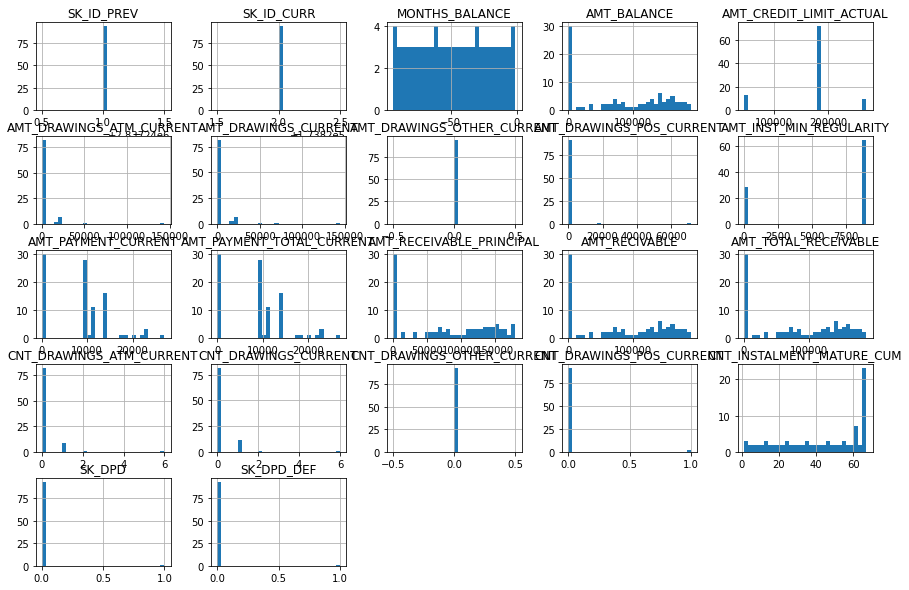

In [38]:
df[df['SK_ID_CURR']==i].sort_values(['MONTHS_BALANCE']).hist(bins=30, figsize=(15, 10))

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

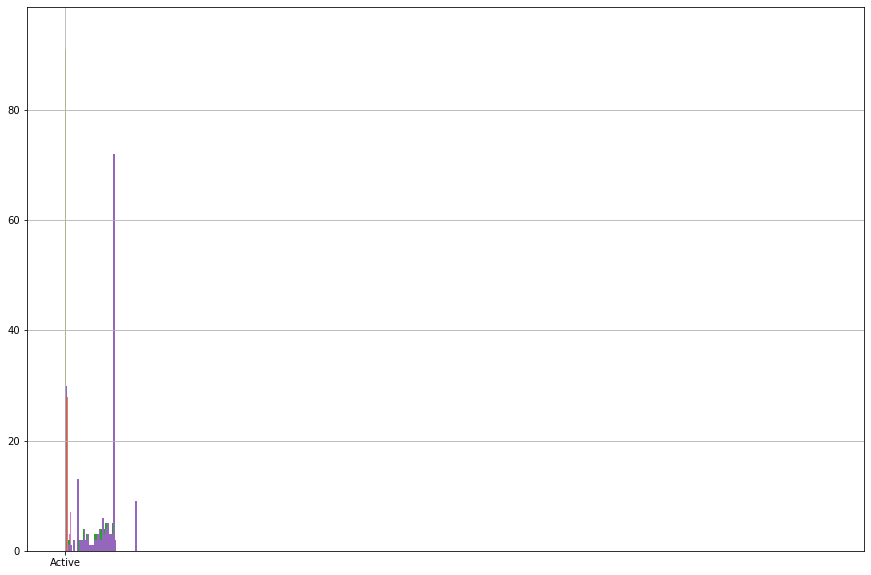

In [40]:
for x in df.columns:
    df[df['SK_ID_CURR']==i].sort_values(['MONTHS_BALANCE'])[x].hist(bins=30, figsize=(15, 10))

In [25]:
df[df['AMT_DRAWINGS_ATM_CURRENT']!=df['AMT_DRAWINGS_CURRENT']].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.0,0.0,0.0,0.0,1,0.0,1.0,35.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.89,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.5,4093.515,4093.515,285376.41,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.7,0.0,34526.7,6338.34,45000.0,45000.0,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0
12,1985699,302517,-4,1427.265,135000,4500.0,101304.72,0.0,96804.72,3023.955,85500.0,85500.0,0.0,0.0,0.0,1.0,30,0.0,29.0,27.0,Active,0,0


In [26]:
df[df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7,2095912,118650,-7,47962.125,45000,45000.0,45000.0,0.0,0.0,0.0,264.69,0.0,44735.31,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
13,1441883,171537,-5,0.0,270000,0.0,0.0,0.0,0.0,12218.49,2607.795,1448.64,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,Active,0,0
14,1864742,303581,-1,0.0,45000,0.0,0.0,0.0,0.0,0.0,2.295,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,59.0,Active,0,0
20,1104090,259807,-6,45413.73,45000,105750.0,105750.0,0.0,0.0,1471.005,86887.98,84637.98,43650.855,44068.23,44068.23,3.0,3,0.0,0.0,16.0,Active,0,0
22,2392920,132481,-1,85792.095,135000,45000.0,63337.815,0.0,18337.815,2250.0,23181.57,18521.55,85086.945,85792.095,85792.095,1.0,9,0.0,8.0,5.0,Active,0,0


In [27]:
df[df['AMT_RECIVABLE']!=df['AMT_TOTAL_RECEIVABLE']].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1276,2346294,168563,-3,1559.61,67500,0.0,0.0,0.0,0.0,4050.0,4050.0,4050.0,0.0,2231.775,2903.94,0.0,0,0.0,0.0,116.0,Active,0,0
7366,1046030,354933,-93,130964.625,135000,0.0,0.0,0.0,0.0,6750.0,6750.0,6750.0,125937.63,131087.52,131210.415,0.0,0,0.0,0.0,7.0,Active,0,0
7400,2270964,377320,-87,67374.63,67500,0.0,0.0,0.0,0.0,3375.0,0.0,0.0,63297.315,68319.63,69264.63,0.0,0,0.0,0.0,6.0,Active,1,1
7625,2148581,214238,-91,110988.225,112500,0.0,0.0,0.0,0.0,5625.0,11250.0,11250.0,107498.34,112563.225,114138.225,0.0,0,0.0,0.0,2.0,Active,0,0
7628,1564535,105077,-88,18026.235,67500,0.0,0.0,0.0,0.0,4050.0,4050.0,4050.0,17240.13,18971.235,19916.235,0.0,0,0.0,0.0,22.0,Active,0,0


In [28]:
df.shape

(3840312, 23)

In [29]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [30]:
df[[
# 'SK_ID_PREV', 
#     'SK_ID_CURR', 
    'MONTHS_BALANCE', 
    'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL',
   
       'AMT_DRAWINGS_CURRENT', 
   
   'AMT_INST_MIN_REGULARITY',
   
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
   
   
        'AMT_TOTAL_RECEIVABLE',
#        'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
#        'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
#        'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 
#    'SK_DPD',
#        'SK_DPD_DEF'
   ]][df['SK_ID_CURR']==i].sort_values(['MONTHS_BALANCE'])

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE
2200883,-57,0.0,157500,0.0,NaN,0.0,0.0,0.0
3194359,-56,160195.05,157500,157248.0,NaN,11250.0,225.0,161761.365
3829700,-55,155398.275,157500,0.0,11025.0,11250.0,225.0,156964.185
896035,-54,150931.935,157500,0.0,11025.0,11250.0,225.0,152465.4
2164509,-53,146096.01,157500,0.0,11025.0,11250.0,225.0,147591.765
3006363,-52,141225.93,157500,0.0,11025.0,11250.0,225.0,142686.405
3229072,-51,135994.95,157500,0.0,11025.0,11250.0,225.0,137417.4
2787364,-50,130690.305,157500,0.0,11025.0,11250.0,225.0,132074.325
649339,-49,124934.31,157500,0.0,11025.0,11250.0,11250.0,124934.31
2548064,-48,119107.575,157500,0.0,11025.0,11025.0,11025.0,120363.84


### 'AMT_DRAWINGS_CURRENT',  vs 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT',

In [31]:
df['AMT_DRAWINGS_CURRENT_CALCULATED'] = df['AMT_DRAWINGS_OTHER_CURRENT'] +  df['AMT_DRAWINGS_POS_CURRENT'] + df['AMT_DRAWINGS_ATM_CURRENT']

In [32]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF', 'AMT_DRAWINGS_CURRENT_CALCULATED'],
      dtype='object')

In [33]:
df[['AMT_DRAWINGS_CURRENT_CALCULATED','AMT_DRAWINGS_CURRENT']].head()

,AMT_DRAWINGS_CURRENT_CALCULATED,AMT_DRAWINGS_CURRENT
0,877.5,877.5
1,2250.0,2250.0
2,0.0,0.0
3,2250.0,2250.0
4,11547.0,11547.0


In [34]:
df[df['AMT_DRAWINGS_CURRENT_CALCULATED']!=df['AMT_DRAWINGS_CURRENT']].shape
df[df['AMT_DRAWINGS_CURRENT_CALCULATED']!=df['AMT_DRAWINGS_CURRENT']].head()

(762114, 24)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_CURRENT_CALCULATED
45,2657726,399970,-5,0.0,225000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,NaN
47,1517613,121258,-6,0.0,135000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,NaN
49,2408643,104761,-4,0.0,225000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,NaN
52,1322825,215709,-5,0.0,180000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0,NaN
53,1894367,113120,-1,0.0,0,0.0,2145.78,0.0,0.0,811.035,2664.45,2664.45,0.0,0.0,0.0,0.0,0,0.0,0.0,8.0,Completed,0,0,0.0


In [36]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF', 'AMT_DRAWINGS_CURRENT_CALCULATED'],
      dtype='object')

In [37]:
df[['AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT']] = df[['AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT']].fillna(0)

In [61]:
df[['AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT']].isnull().sum()

AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
dtype: int64

In [38]:
for i in ['AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT']:
    df[i] = df[i].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 24 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   SK_ID_PREV                       int64  
 1   SK_ID_CURR                       int64  
 2   MONTHS_BALANCE                   int64  
 3   AMT_BALANCE                      float64
 4   AMT_CREDIT_LIMIT_ACTUAL          int64  
 5   AMT_DRAWINGS_ATM_CURRENT         int32  
 6   AMT_DRAWINGS_CURRENT             int32  
 7   AMT_DRAWINGS_OTHER_CURRENT       int32  
 8   AMT_DRAWINGS_POS_CURRENT         int32  
 9   AMT_INST_MIN_REGULARITY          float64
 10  AMT_PAYMENT_CURRENT              float64
 11  AMT_PAYMENT_TOTAL_CURRENT        float64
 12  AMT_RECEIVABLE_PRINCIPAL         float64
 13  AMT_RECIVABLE                    float64
 14  AMT_TOTAL_RECEIVABLE             float64
 15  CNT_DRAWINGS_ATM_CURRENT         float64
 16  CNT_DRAWINGS_CURRENT             int64  
 17  CNT_DRAW

In [40]:
df[['AMT_DRAWINGS_CURRENT_CALCULATED','AMT_DRAWINGS_CURRENT']][df['AMT_DRAWINGS_CURRENT_CALCULATED']!=df['AMT_DRAWINGS_CURRENT']].head()

,AMT_DRAWINGS_CURRENT_CALCULATED,AMT_DRAWINGS_CURRENT
0,877.5,877
8,289339.425,289339
9,111026.7,111026
12,101304.72,101304
21,4412.25,4412


#### Observations:: 

After calculating the individual sum of  'AMT_DRAWINGS_OTHER_CURRENT', +       'AMT_DRAWINGS_POS_CURRENT', +'AMT_DRAWINGS_ATM_CURRENT', and comparing it with 'AMT_DRAWINGS_CURRENT',. It is obsserved that the for 7166 the values are different 

#### Assumptions 
Based on the above observation we are making below assumption
AMT_DRAWINGS_CURRENT is not exact sum of  'AMT_DRAWINGS_OTHER_CURRENT', +       'AMT_DRAWINGS_POS_CURRENT', +'AMT_DRAWINGS_ATM_CURRENT',
there are some additonal factors for calculating the  AMT_DRAWINGS_CURRENT . Considering the AMT_DRAWINGS_CURRENT as the final sum of all the drawings and removing the additional columns


In [41]:
df.drop(['AMT_DRAWINGS_ATM_CURRENT',
        'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT'], inplace=True, axis=1)

In [42]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
       'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF',
       'AMT_DRAWINGS_CURRENT_CALCULATED'],
      dtype='object')

###  'AMT_PAYMENT_CURRENT' vs 'AMT_PAYMENT_TOTAL_CURRENT'

In [43]:
df[df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']].shape
df[df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']].head()

(1955220, 21)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_CURRENT_CALCULATED
7,2095912,118650,-7,47962.125,45000,45000,0.0,264.69,0.0,44735.31,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0,45000.0
13,1441883,171537,-5,0.0,270000,0,12218.49,2607.795,1448.64,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,Active,0,0,0.0
14,1864742,303581,-1,0.0,45000,0,0.0,2.295,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,59.0,Active,0,0,0.0
20,1104090,259807,-6,45413.73,45000,105750,1471.005,86887.98,84637.98,43650.855,44068.23,44068.23,3.0,3,0.0,0.0,16.0,Active,0,0,105750.0
22,2392920,132481,-1,85792.095,135000,63337,2250.0,23181.57,18521.55,85086.945,85792.095,85792.095,1.0,9,0.0,8.0,5.0,Active,0,0,63337.815


In [44]:
df[df['SK_ID_CURR']==173822].sort_values(['MONTHS_BALANCE'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_CURRENT_CALCULATED
2388727,2837241,173822,-94,0.0,180000,0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0,NaN
2428658,2837241,173822,-93,134823.33,180000,144000,NaN,13500.0,13500.0,130500.0,134823.33,134823.33,6.0,6,0.0,0.0,NaN,Active,0,0,144000.0
2112656,2837241,173822,-92,126071.865,180000,0,9000.0,13500.0,13500.0,121323.33,126071.865,126071.865,0.0,0,0.0,0.0,1.0,Active,0,0,0.0
1762690,2837241,173822,-91,139656.645,180000,22500,9000.0,13500.0,13500.0,135071.865,139656.645,139656.645,1.0,1,0.0,0.0,2.0,Active,0,0,22500.0
1514336,2837241,173822,-90,180792.135,180000,49500,9000.0,13500.0,13500.0,175656.645,181440.135,181440.135,2.0,2,0.0,0.0,3.0,Active,0,0,49500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727603,2837241,173822,-5,0.0,45000,0,0.0,19.575,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,67.0,Active,0,0,0.0
2754051,2837241,173822,-4,0.0,45000,0,0.0,19.575,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,67.0,Active,0,0,0.0
906435,2837241,173822,-3,0.0,45000,0,0.0,19.575,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,67.0,Active,0,0,0.0
907946,2837241,173822,-2,0.0,45000,0,0.0,19.575,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,67.0,Active,0,0,0.0


In [45]:
df[df['SK_ID_CURR']==222912][df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']].sort_values(['MONTHS_BALANCE'])

<ipython-input-45-0a7ffe057511>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['SK_ID_CURR']==222912][df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']].sort_values(['MONTHS_BALANCE'])


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_CURRENT_CALCULATED
3053049,1396608,222912,-96,0.0,90000,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
1137671,1396608,222912,-95,0.0,90000,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
404724,1396608,222912,-94,0.0,90000,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
1941418,1396608,222912,-93,0.0,90000,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
1368001,1396608,222912,-92,0.0,90000,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439090,1396608,222912,-23,0.0,0,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
2940974,1396608,222912,-22,0.0,0,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
639761,1396608,222912,-21,0.0,0,0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0
3390261,1396608,222912,-20,0.0,0,0,0.0,8704.485,6750.0,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,Active,0,0,0.0


In [46]:
df[df['SK_ID_CURR']==222912][df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']][['AMT_PAYMENT_CURRENT','AMT_PAYMENT_TOTAL_CURRENT']]

<ipython-input-46-610ca658d6ce>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['SK_ID_CURR']==222912][df['AMT_PAYMENT_CURRENT']!=df['AMT_PAYMENT_TOTAL_CURRENT']][['AMT_PAYMENT_CURRENT','AMT_PAYMENT_TOTAL_CURRENT']]


,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT
45427,1954.485,0.0
49843,1954.485,0.0
84520,1954.485,0.0
133800,1954.485,0.0
138932,1954.485,0.0
...,...,...
3459015,1954.485,0.0
3494104,1954.485,0.0
3678181,28954.485,20250.0
3774459,1954.485,0.0


In [47]:
df['SK_ID_CURR'].sample()

1701667    400832
Name: SK_ID_CURR, dtype: int64

In [48]:
df[df['SK_ID_CURR']==222912].sort_values(['MONTHS_BALANCE']).describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_CURRENT_CALCULATED
count,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0
mean,1396608.0,222912.0,-49.0,0.0,21789.473684210527,304.77894736842103,0.0,1959.9982105263148,284.2105263157895,0.0,-164.5882105263158,-164.5882105263158,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
std,0.0,0.0,27.568097504180443,0.0,38756.71382794629,2970.6177206273546,0.0,2988.4526165481816,2182.988669158696,0.0,545.6463219381548,545.6463219381548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1396608.0,222912.0,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1954.485,-1954.485,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
25%,1396608.0,222912.0,-72.5,0.0,0.0,0.0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
50%,1396608.0,222912.0,-49.0,0.0,0.0,0.0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
75%,1396608.0,222912.0,-25.5,0.0,0.0,0.0,0.0,1954.485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
max,1396608.0,222912.0,-2.0,0.0,90000.0,28954.0,0.0,28954.485,20250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0


In [49]:
df.isnull().sum()

SK_ID_PREV                              0
SK_ID_CURR                              0
MONTHS_BALANCE                          0
AMT_BALANCE                             0
AMT_CREDIT_LIMIT_ACTUAL                 0
AMT_DRAWINGS_CURRENT                    0
AMT_INST_MIN_REGULARITY            305236
AMT_PAYMENT_CURRENT                767988
AMT_PAYMENT_TOTAL_CURRENT               0
AMT_RECEIVABLE_PRINCIPAL                0
AMT_RECIVABLE                           0
AMT_TOTAL_RECEIVABLE                    0
CNT_DRAWINGS_ATM_CURRENT           749816
CNT_DRAWINGS_CURRENT                    0
CNT_DRAWINGS_OTHER_CURRENT         749816
CNT_DRAWINGS_POS_CURRENT           749816
CNT_INSTALMENT_MATURE_CUM          305236
NAME_CONTRACT_STATUS                    0
SK_DPD                                  0
SK_DPD_DEF                              0
AMT_DRAWINGS_CURRENT_CALCULATED    749816
dtype: int64

In [ ]:
CNT_DRAWINGS_CURRENT  
CNT_DRAWINGS_ATM_CURRENT
CNT_DRAWINGS_OTHER_CURRENT        
CNT_DRAWINGS_POS_CURRENT          


filling AMT_PAYMENT_CURRENT with 0

In [51]:
df.fillna(0, inplace=True)

In [52]:
df.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_CURRENT               0
AMT_INST_MIN_REGULARITY            0
AMT_PAYMENT_CURRENT                0
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT           0
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT         0
CNT_DRAWINGS_POS_CURRENT           0
CNT_INSTALMENT_MATURE_CUM          0
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
AMT_DRAWINGS_CURRENT_CALCULATED    0
dtype: int64

In [53]:
df_corr=df.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1).corr(method='spearman')
    

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

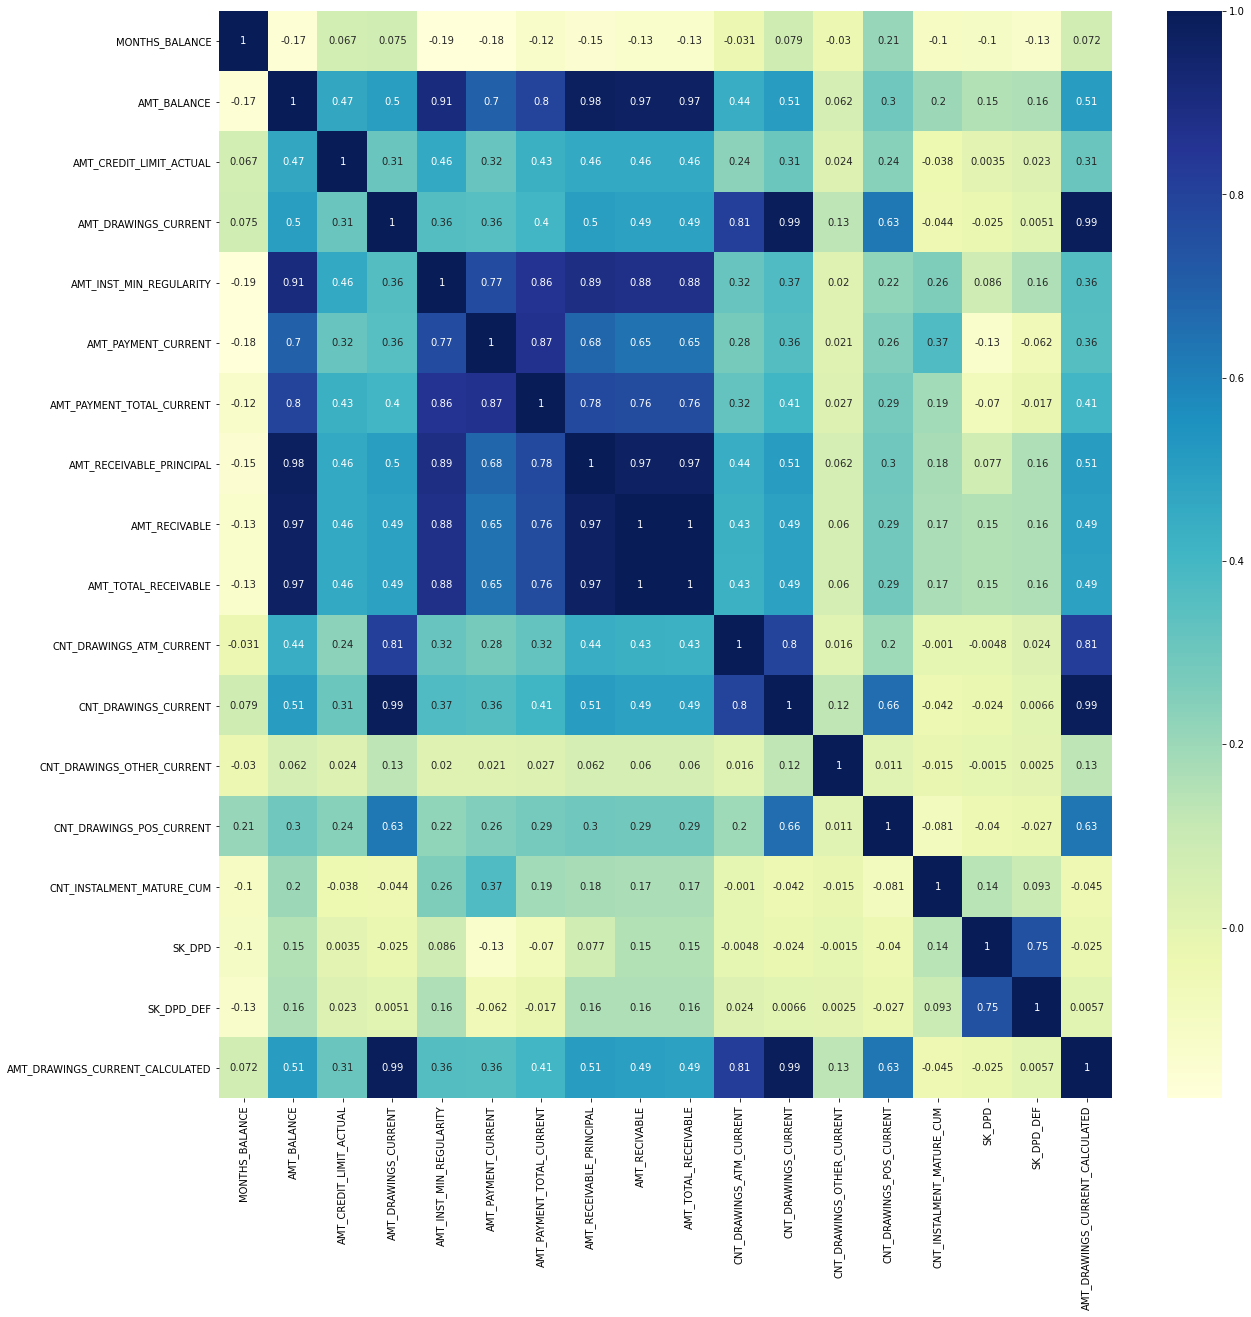

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True, cmap="YlGnBu")

### from the correlation matrix we can infer that the AMT_TOTAL_RECEIVABLE is correlated with AMT_RECIVABLE and AMT_RECEIVABLE_PRINCIPAL

### from the correlation matrix we can infer that the AMT_TOTAL_RECEIVABLE is correlated with AMT_RECIVABLE and AMT_RECEIVABLE_PRINCIPAL

In [55]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
       'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF',
       'AMT_DRAWINGS_CURRENT_CALCULATED'],
      dtype='object')

In [56]:
df[df['SK_ID_CURR']==222912][['AMT_DRAWINGS_CURRENT',
       
       'AMT_PAYMENT_TOTAL_CURRENT', 
       'AMT_TOTAL_RECEIVABLE','MONTHS_BALANCE'] ].sort_values(['MONTHS_BALANCE']).describe()

,AMT_DRAWINGS_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,MONTHS_BALANCE
count,95.0,95.0,95.0,95.0
mean,304.77894736842103,284.2105263157895,-164.5882105263158,-49.0
std,2970.6177206273546,2182.988669158696,545.6463219381548,27.568097504180443
min,0.0,0.0,-1954.485,-96.0
25%,0.0,0.0,0.0,-72.5
50%,0.0,0.0,0.0,-49.0
75%,0.0,0.0,0.0,-25.5
max,28954.0,20250.0,0.0,-2.0


In [58]:
'AMT_DRAWINGS_CURRENT',   'AMT_PAYMENT_TOTAL_CURRENT',      'AMT_TOTAL_RECEIVABLE',

('AMT_DRAWINGS_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_TOTAL_RECEIVABLE')

In [59]:
df['SK_ID_CURR'].sample()

1102838    415979
Name: SK_ID_CURR, dtype: int64

In [60]:
df[df['SK_ID_CURR']==417407][['AMT_BALANCE','AMT_DRAWINGS_CURRENT',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
       'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE','MONTHS_BALANCE'] ].sort_values(['MONTHS_BALANCE'])

,AMT_BALANCE,AMT_DRAWINGS_CURRENT,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,MONTHS_BALANCE
2572073,25015.455,25015,0.0,0.0,25015.455,25015.455,25015.455,-23
1375083,123898.14,102078,4500.0,4500.0,122852.295,124156.665,124156.665,-22
21495,337764.24,243748,40500.0,40500.0,328205.16,336019.23,336019.23,-21
1877037,353745.45,24324,22500.0,22500.0,343159.92,354939.3,354939.3,-20
1489164,371727.135,23231,18450.0,18450.0,362451.915,374409.72,374409.72,-19
2151129,422201.79,53138,18900.0,18900.0,410073.975,422301.645,422301.645,-18
1152650,553028.94,126792,22500.0,22500.0,531154.395,543610.44,543610.44,-17
3499219,702081.495,144918,28350.0,28350.0,675546.66,691317.495,691317.495,-16
2450662,787416.255,90624,36900.0,36900.0,764927.145,782034.255,782034.255,-15
2534854,782050.455,5894,39825.0,39825.0,762256.98,782050.455,782050.455,-14


In [236]:
df_4 = df.drop_duplicates(subset =['SK_ID_CURR'],  keep='last')
df_4.shape

(103558, 14)

In [237]:
df_2.shape
df_4.shape

(103558, 10)

In [112]:
103558-104307

-749

In [113]:
df.shape

(3840312, 14)

In [63]:
df_4['NAME_CONTRACT_STATUS'].shape

(103558,)

In [64]:
df.sort_values(['MONTHS_BALANCE'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_CURRENT_CALCULATED
24268,2191008,186722,-96,0.0,112500,0,0.0,324.765,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,8.0,Active,0,0,0.0
841327,1462198,437589,-96,58390.83,180000,54000,0.0,0.0,0.0,54000.0,58390.83,58390.83,3.0,3,0.0,0.0,0.0,Active,0,0,54000.0
2725728,2181176,123766,-96,111440.97,112500,0,5625.0,5625.0,5625.0,108001.485,111440.97,111440.97,0.0,0,0.0,0.0,2.0,Active,0,0,0.0
2725726,1365551,162637,-96,0.0,270000,0,0.0,9303.84,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,11.0,Active,0,0,0.0
841332,1619825,271412,-96,112052.745,135000,54000,8100.0,9000.0,9000.0,106781.4,112052.745,112052.745,2.0,2,0.0,0.0,5.0,Active,0,0,54000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395926,2116047,243443,-1,227152.305,225000,4020,11536.875,11825.865,11825.865,222193.98,227152.305,227152.305,0.0,5,0.0,5.0,10.0,Active,0,0,4020.705
395931,1396266,163805,-1,0.0,13500,0,0.0,3.735,3.735,0.0,0.0,0.0,0.0,0,0.0,0.0,18.0,Active,0,0,0.0
395938,1468878,269362,-1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Completed,0,0,0.0
395901,1367649,167456,-1,73902.69,135000,0,5800.86,45000.0,45000.0,71017.335,73355.85,73355.85,0.0,0,0.0,0.0,12.0,Active,0,0,0.0


In [65]:
df.shape

(3840312, 21)

New Columns - 

No of installments 
average AMT_BALANCE
total AMT_DRAWINGS_CURRENT
Average AMT_CREDIT_LIMIT_ACTUAL
total_AMT_INST_MIN_REGULARITY
total CNT_DRAWINGS_CURRENT
total_AMT_PAYMENT_TOTAL_CURRENT
total_AMT_PAYMENT_CURRENT

total_SK_DPD_DEF

total_SK_DPD

NAME_CONTRACT_STATUS at -1


columns to be dropped 
CNT_INSTALMENT_MATURE_CUM
CNT_DRAWINGS_POS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT
CNT_DRAWINGS_ATM_CURRENT
AMT_RECIVABLE
AMT_RECEIVABLE_PRINCIPAL

In [66]:
df.drop(['CNT_INSTALMENT_MATURE_CUM',
'CNT_DRAWINGS_POS_CURRENT',
'CNT_DRAWINGS_OTHER_CURRENT',
'CNT_DRAWINGS_ATM_CURRENT',
'AMT_RECIVABLE',
         
'AMT_RECEIVABLE_PRINCIPAL','AMT_DRAWINGS_CURRENT_CALCULATED'], inplace=True, axis=1)

In [85]:
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,877,1700.325,1800.0,1800.0,0.0,1,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250,2250.0,2250.0,2250.0,64875.555,1,Active,0,0
2,1740877,371185,-7,31815.225,450000,0,2250.0,2250.0,2250.0,31460.085,0,Active,0,0
3,1389973,337855,-4,236572.11,225000,2250,11795.76,11925.0,11925.0,233048.97,1,Active,0,0
4,1891521,126868,-1,453919.455,450000,11547,22924.89,27000.0,27000.0,453919.455,1,Active,0,0


In [130]:
df['Unique_id'] = df['SK_ID_CURR'] + df['SK_ID_PREV']


In [133]:
df_2 = df.groupby(['Unique_id']).agg({
    'SK_ID_CURR':'median','SK_ID_PREV':'median','MONTHS_BALANCE':'count', 
                                     'AMT_BALANCE': 'mean', 
                                     'AMT_INST_MIN_REGULARITY': 'sum',
                                    'AMT_DRAWINGS_CURRENT': 'sum',
                                    'CNT_DRAWINGS_CURRENT': 'sum',
                                    'AMT_PAYMENT_TOTAL_CURRENT': 'sum',
                                    'AMT_PAYMENT_CURRENT':'sum',
                                    'SK_DPD_DEF':'sum',
                                    'SK_DPD':'sum'}).reset_index().rename({'MONTHS_BALANCE':'No_OF_INSTALLMENTS',
                                                                                         'AMT_BALANCE':'AVG_AMT_BALANCE',
                                                                                         'AMT_INST_MIN_REGULARITY':'SUM_AMT_INST_MIN_REGULARITY',
                                                                                         'AMT_DRAWINGS_CURRENT':'SUM_AMT_DRAWINGS_CURRENT',
                                                                                         'CNT_DRAWINGS_CURRENT':'TOTAL_CNT_DRAWINGS_CURRENT',
                                                                                         'AMT_PAYMENT_TOTAL_CURRENT':'SUM_AMT_PAYMENT_TOTAL_CURRENT',
                                                                                        'AMT_PAYMENT_CURRENT':'SUM_AMT_PAYMENT_CURRENT',
                                                                                       'SK_DPD_DEF':'SUM_SK_DPD_DEF',
                                                                               'SK_DPD':'SUM_SK_DPD',
                                                                                              })
# .rename(columns={'TOTAL_INSTALLMENTS':'AVG_AMT_BALANCE'})

In [134]:
df_2.head()

,Unique_id,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_INST_MIN_REGULARITY,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_PAYMENT_CURRENT,SK_DPD_DEF,SK_DPD
0,1102622,101961.0,1000661.0,13,546.9438461538462,2250.0,45852,30,48112.875,50362.875,0,0
1,1104745,104049.0,1000696.0,3,0.0,0.0,0,0,0.0,0.0,0,0
2,1106636,101652.0,1004984.0,15,353740.04699999996,268765.65,477000,12,681403.815,681403.815,0,0
3,1106851,103734.0,1003117.0,19,40505.579999999994,50056.515,406315,11,442722.735,442722.735,0,0
4,1107816,104041.0,1003775.0,8,43646.38875,14148.9,48837,52,14913.855,15254.145,0,0



No of installments 
average AMT_BALANCE
total AMT_DRAWINGS_CURRENT
Average AMT_CREDIT_LIMIT_ACTUAL
total_AMT_INST_MIN_REGULARITY
total CNT_DRAWINGS_CURRENT
total_AMT_PAYMENT_TOTAL_CURRENT```````````````````/m
total_AMT_PAYMENT_CURRENT

total_SK_DPD_DEF

total_SK_DPD

NAME_CONTRACT_STATUS at -1

In [135]:
df_2.rename(columns={'MONTHS_BALANCE':'No_OF_INSTALLMENTS',
             'AMT_BALANCE':'AVG_AMT_BALANCE',
             'AMT_INST_MIN_REGULARITY':'SUM_AMT_INST_MIN_REGULARITY',
             'AMT_DRAWINGS_CURRENT':'SUM_AMT_DRAWINGS_CURRENT',
             'CNT_DRAWINGS_CURRENT':'TOTAL_CNT_DRAWINGS_CURRENT',
             'AMT_PAYMENT_TOTAL_CURRENT':'SUM_AMT_PAYMENT_TOTAL_CURRENT',
            'AMT_PAYMENT_CURRENT':'SUM_AMT_PAYMENT_CURRENT',
           'SK_DPD_DEF':'SUM_SK_DPD_DEF',
   'SK_DPD':'SUM_SK_DPD' }, inplace=True)

In [90]:
df[df['MONTHS_BALANCE']==-4][['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS','MONTHS_BALANCE']].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,MONTHS_BALANCE
3,1389973,337855,Active,-4
8,2181852,367360,Active,-4
12,1985699,302517,Active,-4
19,1189095,231608,Active,-4
29,1288249,406607,Active,-4


In [91]:
df['MONTHS_BALANCE'].value_counts()

-4     102115
-5     100546
-3     100355
-6      98577
-7      95332
        ...  
-92     14911
-93     14197
-94     13397
-95     12521
-96     11722
Name: MONTHS_BALANCE, Length: 96, dtype: int64

In [92]:
df_2.head()

,SK_ID_PREV,SK_ID_CURR,No_OF_INSTALLMENTS,AVG_AMT_BALANCE,SUM_AMT_INST_MIN_REGULARITY,SUM_AMT_DRAWINGS_CURRENT,TOTAL_CNT_DRAWINGS_CURRENT,SUM_AMT_PAYMENT_TOTAL_CURRENT,SUM_AMT_PAYMENT_CURRENT,SUM_SK_DPD_DEF,SUM_SK_DPD
0,1000018,394447,5,74946.285,12970.44,147392,44,27708.75,27708.75,0,0
1,1000030,361282,8,55991.064375,16625.79,138056,41,21263.579999999998,43320.42,0,0
2,1000031,131335,16,52394.439374999994,42804.81,463352,21,354519.08999999997,354519.08999999997,0,0
3,1000035,436351,5,0.0,0.0,0,0,0.0,0.0,0,0
4,1000077,181153,11,0.0,0.0,0,0,0.0,0.0,0,0


In [136]:
df_2['No_OF_INSTALLMENTS'].value_counts()<2

96     False
8      False
7      False
9      False
10     False
       ...  
157     True
210     True
206     True
209     True
154     True
Name: No_OF_INSTALLMENTS, Length: 195, dtype: bool

In [94]:
df_3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
1,2582071,363914,Active
4,1891521,126868,Active
11,2740914,340339,Active
14,1864742,303581,Active
15,2037377,289902,Active


In [243]:
df_final = pd.merge(df_4[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']],df_2, how='left', on=['SK_ID_CURR']) 

In [244]:
df_final.shape

(103558, 12)

In [139]:
df_2.head()

,Unique_id,SK_ID_CURR,SK_ID_PREV,No_OF_INSTALLMENTS,AVG_AMT_BALANCE,SUM_AMT_INST_MIN_REGULARITY,SUM_AMT_DRAWINGS_CURRENT,TOTAL_CNT_DRAWINGS_CURRENT,SUM_AMT_PAYMENT_TOTAL_CURRENT,SUM_AMT_PAYMENT_CURRENT,SUM_SK_DPD_DEF,SUM_SK_DPD
0,1102622,101961.0,1000661.0,13,546.9438461538462,2250.0,45852,30,48112.875,50362.875,0,0
1,1104745,104049.0,1000696.0,3,0.0,0.0,0,0,0.0,0.0,0,0
2,1106636,101652.0,1004984.0,15,353740.04699999996,268765.65,477000,12,681403.815,681403.815,0,0
3,1106851,103734.0,1003117.0,19,40505.579999999994,50056.515,406315,11,442722.735,442722.735,0,0
4,1107816,104041.0,1003775.0,8,43646.38875,14148.9,48837,52,14913.855,15254.145,0,0


In [140]:
df_final.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,Unique_id,No_OF_INSTALLMENTS,AVG_AMT_BALANCE,SUM_AMT_INST_MIN_REGULARITY,SUM_AMT_DRAWINGS_CURRENT,TOTAL_CNT_DRAWINGS_CURRENT,SUM_AMT_PAYMENT_TOTAL_CURRENT,SUM_AMT_PAYMENT_CURRENT,SUM_SK_DPD_DEF,SUM_SK_DPD
0,1509266,328898,Active,1838164.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1896199,318076,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1381012,151929,Active,1532941.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1080387,219622,Active,1300009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1107770,209597,Active,1317367.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_final.sample()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,No_OF_INSTALLMENTS,AVG_AMT_BALANCE,SUM_AMT_INST_MIN_REGULARITY,SUM_AMT_DRAWINGS_CURRENT,TOTAL_CNT_DRAWINGS_CURRENT,SUM_AMT_PAYMENT_TOTAL_CURRENT,SUM_AMT_PAYMENT_CURRENT,SUM_SK_DPD_DEF,SUM_SK_DPD
83905,2128173,267474,Active,14,112.9692857142857,1581.57,32959,18,38170.71000000001,38170.71000000001,0,0


In [99]:
df_final.shape

(103558, 12)

In [125]:
df_final_v1 = df_final.copy()

In [126]:
df_final_v1['Unique_id'] = df_final_v1['SK_ID_CURR'] + df_final_v1['SK_ID_PREV']

In [127]:
df_final_v1['Unique_id'].nunique()

101569

In [109]:
101569 - 100863

706

In [183]:
df_final.shape

(103558, 11)

In [150]:
df_2.shape
df_3.shape

(103558, 10)

(62356, 3)

In [133]:
df.shape
df_2.shape

(3840312, 14)

(103558, 10)

In [135]:
1/(103558/3840312)

37.08368257401649

In [130]:
df[df['SK_ID_CURR']==100011].sort_values(['MONTHS_BALANCE'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3131464,1843384,100011,-75,189000,180000,180000,0.000,0.000,0.0,189000.000,4,Active,0,0
2447092,1843384,100011,-74,184568,180000,0,9000.000,9000.000,9000.0,184568.850,0,Active,0,0
2353190,1843384,100011,-73,181044,180000,0,9000.000,9000.000,9000.0,181044.540,0,Active,0,0
1086495,1843384,100011,-72,177544,180000,0,9000.000,9000.000,9000.0,177544.350,0,Active,0,0
1872143,1843384,100011,-71,173901,180000,0,9000.000,9000.000,9000.0,173901.915,0,Active,0,0
1189825,1843384,100011,-70,170289,180000,0,9000.000,9000.000,9000.0,170289.720,0,Active,0,0
3805973,1843384,100011,-69,166628,180000,0,9000.000,9000.000,9000.0,166628.160,0,Active,0,0
3245151,1843384,100011,-68,162659,180000,0,9000.000,9000.000,9000.0,162659.970,0,Active,0,0
1066638,1843384,100011,-67,158878,180000,0,9000.000,9000.000,9000.0,158878.845,0,Active,0,0
1895726,1843384,100011,-66,154960,180000,0,9000.000,9000.000,9000.0,154960.740,0,Active,0,0


In [192]:
df_final[df_final['SK_ID_CURR']==100011]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,No_OF_INSTALLMENTS,AVG_AMT_BALANCE,SUM_AMT_INST_MIN_REGULARITY,SUM_AMT_DRAWINGS_CURRENT,TOTAL_CNT_DRAWINGS_CURRENT,SUM_AMT_PAYMENT_TOTAL_CURRENT,SUM_AMT_PAYMENT_CURRENT,SUM_SK_DPD_DEF,SUM_SK_DPD
77838,1843384,100011,Active,74,54481.878378,288804.195,180000,4,334485.0,358386.75,0,0


Final List of the columns 

No of installments 

average AMT_BALANCE

total AMT_DRAWINGS_CURRENT

Average AMT_CREDIT_LIMIT_ACTUAL

total_AMT_INST_MIN_REGULARITY

total CNT_DRAWINGS_CURRENT

total_AMT_PAYMENT_TOTAL_CURRENT

total_AMT_PAYMENT_CURRENT

total_SK_DPD_DEF

total_SK_DPD

NAME_CONTRACT_STATUS at -1

In [241]:
df_final.shape

(104307, 15)

In [245]:
df_final.to_pickle("CCB_cleaned_v3.pkl")